# Kratos 3D Model Viewer (Python Implementation)
This notebook replicates the Three.js visualizations using Python libraries: trimesh, vedo, numpy, and matplotlib.

**Four Interactive Visualization Modes (matching Three.js):**
1. **Faces Mode** - Solid rendering with materials and lighting
2. **Wireframe Mode** - Green wireframe (color: #00ff00)
3. **Edges Mode** - Blue edges (color: #0000ff)
4. **Vertices Mode** - Red points (color: #ff0000)

**💡 All visualizations are interactive!** Use your mouse to rotate, zoom, and pan the 3D models.

## 1. Install Required Libraries
Run this cell first if you're in Google Colab or if you need to install the packages.

In [1]:
# Uncomment the following lines if you need to install packages
# !pip install trimesh[easy]
# !pip install vedo
# !pip install numpy
# !pip install matplotlib

## 2. Import Libraries

In [4]:
import trimesh
import numpy as np
import matplotlib.pyplot as plt
from vedo import Mesh, Points, Lines, show
from mpl_toolkits.mplot3d import Axes3D
import os

## 3. Load the Kratos Model
For Google Colab, you'll need to upload the model files first.

In [5]:
# For local Jupyter: Use relative path
model_path = '../media/kratos/scene.gltf'

# For Google Colab: Upload files and use this instead
# from google.colab import files
# uploaded = files.upload()
# model_path = 'scene.gltf'

# Load the model with trimesh for analysis
print("Loading Kratos model...")
scene = trimesh.load(model_path)

# If the scene contains multiple meshes, combine them for analysis
if isinstance(scene, trimesh.Scene):
    mesh = trimesh.util.concatenate(
        [geometry for geometry in scene.geometry.values()
         if isinstance(geometry, trimesh.Trimesh)]
    )
else:
    mesh = scene

print("Model loaded successfully!")

Loading Kratos model...
Model loaded successfully!


## 4. Display Structural Information

In [6]:
def print_mesh_info(mesh):
    """Display detailed information about the mesh structure"""
    print("="*60)
    print("KRATOS MODEL - STRUCTURAL INFORMATION")
    print("="*60)
    print(f"\n📊 Vertices:  {len(mesh.vertices):,}")
    print(f"📐 Faces:     {len(mesh.faces):,}")
    print(f"📏 Edges:     {len(mesh.edges):,}")
    print(f"\n🔺 Triangles: {len(mesh.faces):,}")
    print(f"🔢 Euler characteristic: {mesh.euler_number}")
    print(f"\n📦 Bounding Box:")
    print(f"   Min: {mesh.bounds[0]}")
    print(f"   Max: {mesh.bounds[1]}")
    print(f"\n📏 Dimensions: {mesh.extents}")
    print(f"🎯 Center of Mass: {mesh.center_mass}")
    print(f"📐 Surface Area: {mesh.area:.2f}")
    print(f"🧊 Volume: {mesh.volume:.2f}")
    print(f"\n✅ Is Watertight: {mesh.is_watertight}")
    print(f"🔄 Is Winding Consistent: {mesh.is_winding_consistent}")
    print("="*60)

print_mesh_info(mesh)

KRATOS MODEL - STRUCTURAL INFORMATION

📊 Vertices:  14,362
📐 Faces:     24,413
📏 Edges:     73,239

🔺 Triangles: 24,413
🔢 Euler characteristic: 71

📦 Bounding Box:
   Min: [-9.35614014e+01 -1.33139481e+02 -6.64494728e-05]
   Max: [ 86.88251495  15.11262989 157.31672668]

📏 Dimensions: [180.44391632 148.25211048 157.31679313]
🎯 Center of Mass: [-7.27082987 -2.83906961 98.19541668]
📐 Surface Area: 33855.16
🧊 Volume: 93798.14

✅ Is Watertight: False
🔄 Is Winding Consistent: True


## 5. Visualization 1: Faces Mode (Solid)
Complete solid rendering with materials and lighting (matching Three.js implementation).

**Interactive Controls:**
- **Left-click + drag**: Rotate the model
- **Scroll wheel**: Zoom in/out
- **Right-click + drag**: Pan/move the view
- **Middle-click**: Reset view

Creating faces mode visualization...
Applied material color from model
Displaying faces mode (solid rendering)...
TIP: Click and drag to rotate, scroll to zoom, right-click to pan


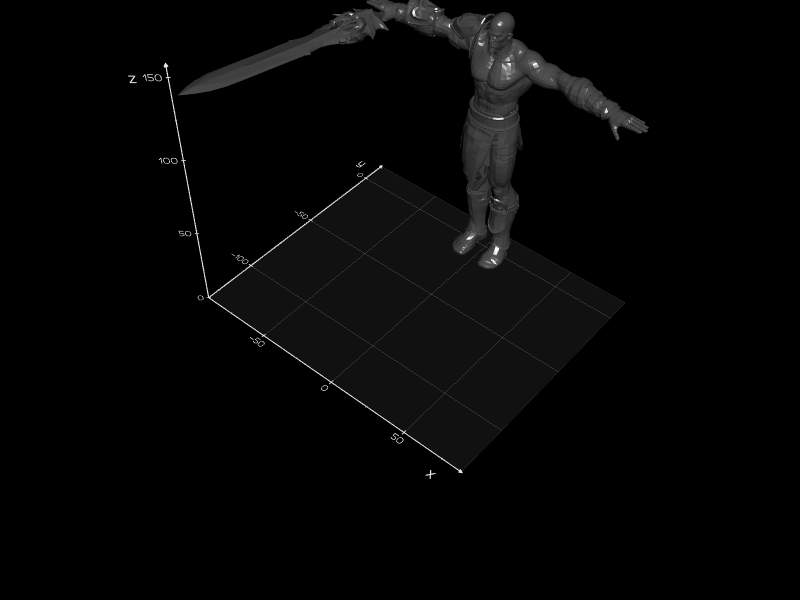

In [7]:
# Create solid mesh with enhanced visual appearance
print("Creating faces mode visualization...")

# Try to get visual properties from the original scene
vedo_mesh = Mesh([mesh.vertices, mesh.faces])

# Check if the scene has visual properties (colors/textures)
if isinstance(scene, trimesh.Scene):
    # Try to extract colors from the scene geometry
    for geom_name, geom in scene.geometry.items():
        if hasattr(geom, 'visual') and hasattr(geom.visual, 'vertex_colors'):
            # If vertex colors exist, use them
            if geom.visual.vertex_colors is not None:
                colors = geom.visual.vertex_colors[:, :3] / 255.0  # Normalize RGB
                vedo_mesh.pointcolors(colors)
                print("Applied vertex colors from model")
                break
        elif hasattr(geom, 'visual') and hasattr(geom.visual, 'material'):
            # Try to use material colors
            material = geom.visual.material
            if hasattr(material, 'main_color'):
                color = material.main_color[:3] / 255.0
                vedo_mesh.color(color)
                print("Applied material color from model")
                break

# Apply glossy lighting and smooth shading for better appearance
vedo_mesh.lighting('glossy').phong()

print("Displaying faces mode (solid rendering)...")
print("TIP: Click and drag to rotate, scroll to zoom, right-click to pan")
show(vedo_mesh, 
     title="Visualization 1: Faces Mode (Solid)",
     axes=1, 
     viewup="z",
     bg='black',
     interactive=True)

## 6. Visualization 2: Wireframe Mode
Green wireframe visualization showing the complete mesh topology (matching Three.js implementation).

Displaying wireframe mode - 24,413 faces...
TIP: Click and drag to rotate, scroll to zoom, right-click to pan


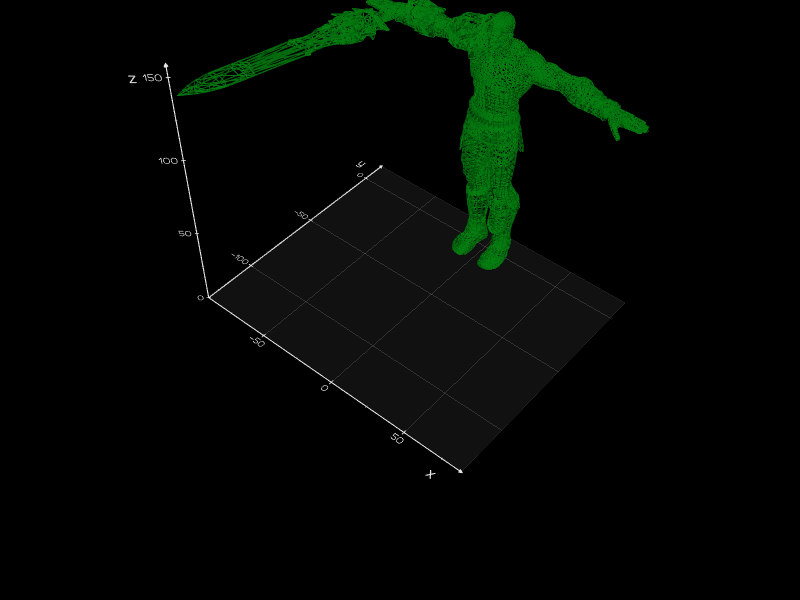

In [8]:
# Create green wireframe (matching Three.js style)
vedo_mesh_wireframe = Mesh([mesh.vertices, mesh.faces])
vedo_mesh_wireframe.color('green').wireframe(True).linewidth(1)

print(f"Displaying wireframe mode - {len(mesh.faces):,} faces...")
print("TIP: Click and drag to rotate, scroll to zoom, right-click to pan")
show(vedo_mesh_wireframe,
     title="Visualization 2: Wireframe Mode (Green)",
     axes=1,
     viewup="z",
     bg='black',
     interactive=True)

## 7. Visualization 3: Edges Mode
Blue edge visualization showing principal edges (matching Three.js EdgesGeometry).

Displaying edges mode - 73,239 edges...
TIP: Click and drag to rotate, scroll to zoom, right-click to pan


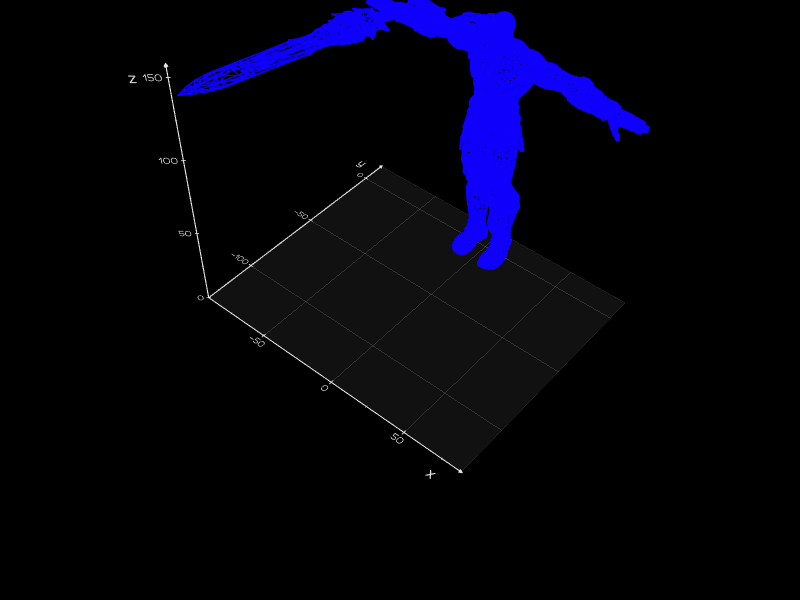

In [9]:
# Create pure blue edges visualization (matching Three.js style)
edges_lines = Lines(mesh.vertices[mesh.edges[:, 0]], 
                   mesh.vertices[mesh.edges[:, 1]], 
                   c='blue', lw=1.5)

print(f"Displaying edges mode - {len(mesh.edges):,} edges...")
print("TIP: Click and drag to rotate, scroll to zoom, right-click to pan")
show(edges_lines,
     title=f"Visualization 3: Edges Mode (Blue) - {len(mesh.edges):,} edges",
     axes=1,
     viewup="z",
     bg='black',
     interactive=True)

## 8. Visualization 4: Vertices Mode
Red points visualization showing all vertices (matching Three.js implementation).

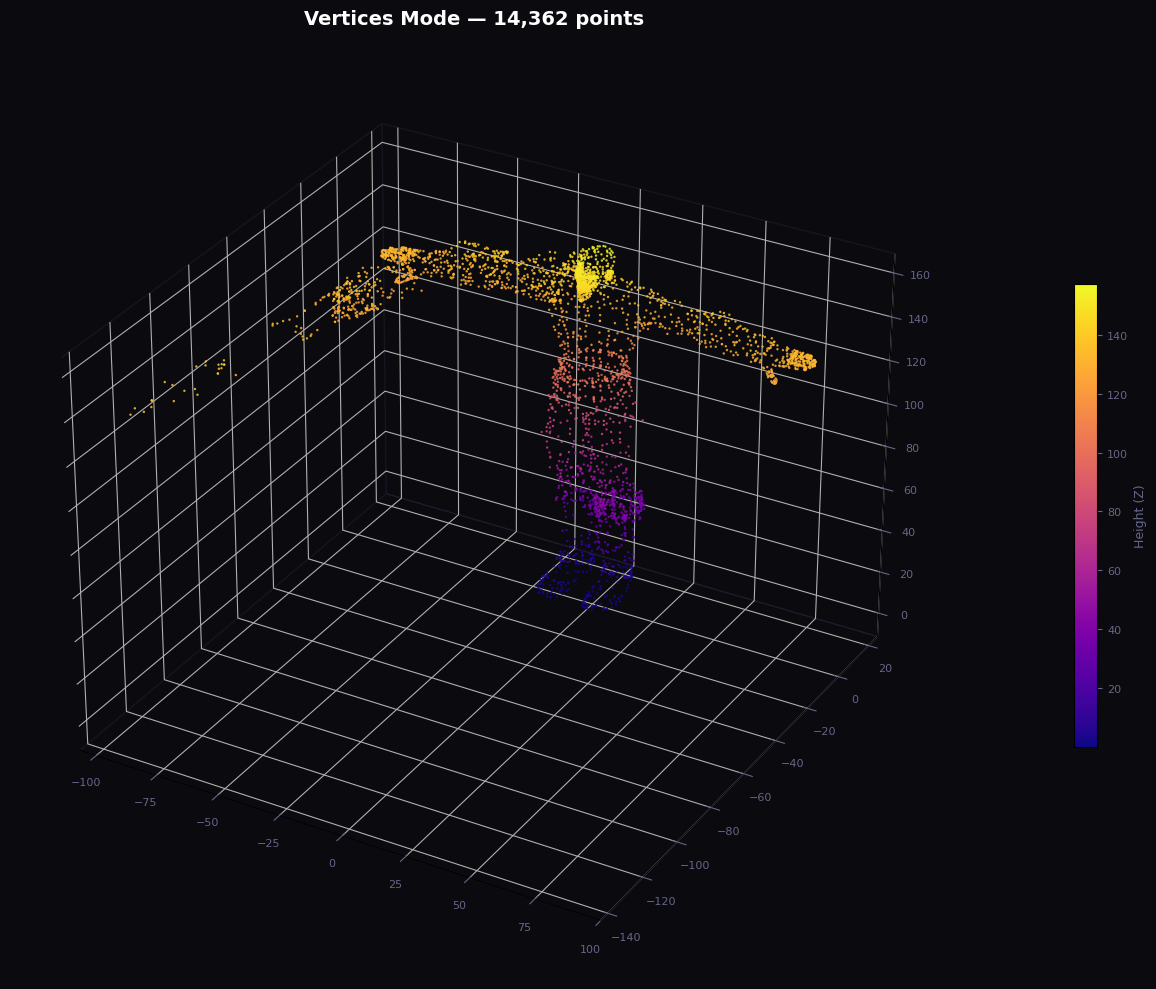

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(14, 10), facecolor='#0a0a0f')
ax = fig.add_subplot(111, projection='3d', facecolor='#0a0a0f')

vertices = mesh.vertices
step = max(1, len(vertices) // 3000)
sample = vertices[::step]

# Color por altura (eje Z) para dar profundidad visual
z_norm = (sample[:,2] - sample[:,2].min()) / (sample[:,2].max() - sample[:,2].min())
colors = plt.cm.plasma(z_norm)

scatter = ax.scatter(sample[:,0], sample[:,1], sample[:,2],
                     c=colors, s=3, alpha=0.85, linewidths=0)

# Estilo oscuro
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
ax.xaxis.pane.set_edgecolor('#222233')
ax.yaxis.pane.set_edgecolor('#222233')
ax.zaxis.pane.set_edgecolor('#222233')
ax.grid(True, color='#222233', linewidth=0.5, alpha=0.5)
ax.tick_params(colors='#666688', labelsize=8)
ax.xaxis.label.set_color('#666688')
ax.yaxis.label.set_color('#666688')
ax.zaxis.label.set_color('#666688')

ax.set_title(f'Vertices Mode — {len(vertices):,} points', 
             color='white', fontsize=14, pad=20, fontweight='bold')

# Colorbar
mappable = plt.cm.ScalarMappable(cmap='plasma')
mappable.set_array(sample[:,2])
cbar = plt.colorbar(mappable, ax=ax, shrink=0.5, pad=0.1)
cbar.set_label('Height (Z)', color='#666688', fontsize=9)
cbar.ax.yaxis.set_tick_params(color='#666688')
plt.setp(cbar.ax.yaxis.get_ticklabels(), color='#666688', fontsize=8)

plt.tight_layout()
plt.show()


## Summary

This notebook provides four key **interactive** visualizations of the Kratos 3D model, **matching the Three.js implementation**:

### Visualization Modes:
1. **Faces Mode (Solid)**: Complete solid rendering with Phong shading and material colors
2. **Wireframe Mode (Green)**: Complete mesh topology in green (#00ff00)
3. **Edges Mode (Blue)**: Principal edges in blue (#0000ff)
4. **Vertices Mode (Red)**: All vertex points in red (#ff0000)

### Interactive Controls:
- **Left-click + drag**: Rotate the model
- **Scroll wheel**: Zoom in/out  
- **Right-click + drag**: Pan/move the view
- **Middle-click**: Reset camera view

### Visual Style:
- **Black background** for all visualizations (matching Three.js)
- **Color scheme** matches the Three.js implementation exactly
- **Clean presentation** without overlays or mixed elements

### Model Statistics:
- **Vertices**: 14,362 points
- **Edges**: 73,239 lines
- **Faces**: 24,413 triangles

Each visualization mode highlights different aspects of the 3D mesh structure for analysis and understanding, providing the same experience as the web-based Three.js viewer.